In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size':12})

n = 101

T_old = np.zeros(n)
T_new = np.zeros(n)

for i in range(1,n-1):
    T_old[i] = 100.

l = 1
dx = 1/(n-1)
x = np.linspace(0,1,n)
print('dx= %.2f' %dx)

k = 0.01
dt_max = dx**2 / 2 / k
dt = 0.2 * dt_max
print('maximum dt = %.4f.'% dt_max)
print('used dt = %.4f'% dt)


dx= 0.01
maximum dt = 0.0050.
used dt = 0.0010


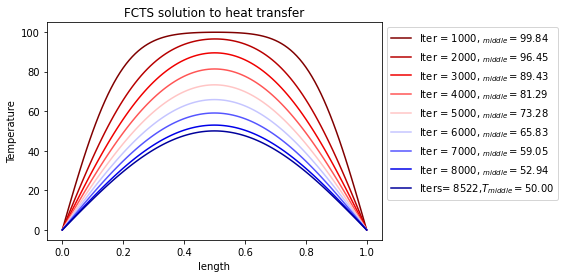

In [2]:
count = 0
count2 = 0
colors = plt.cm.seismic_r(np.linspace(0,1,10))

while T_old[int(n/2)] > 50.0:

    for i in range(1,n-1):
        T_new[i] = T_old[i] + dt * k * (T_old[i+1] -2*T_old[i] + T_old[i-1])/dx**2
    T_old = T_new
    count += 1 
    if count%1000 == 0:
        plt.plot(x,T_new, color=colors[count2], 
                label='Iter = %g, $_{middle}=%.2f$'%(count,T_old[int(n/2)])  )
        count2 += 1

plt.plot(x,T_new, color=colors[count2],
        label='Iters= %g,$T_{middle}=%.2f$' %(count,T_old[int(n/2)]))
plt.title('FCTS solution to heat transfer')
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel('length')
plt.ylabel('Temperature')
plt.show()        

dx = 0.01
Maximum dt = 0.0050.
Used dt = 0.0100.


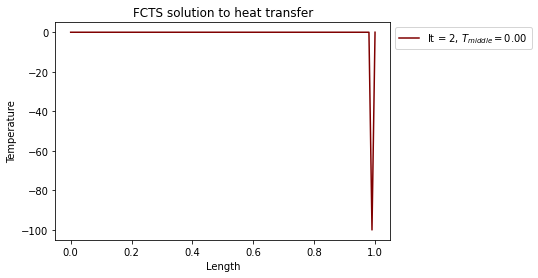

In [4]:
n = 101

T_old = np.array([100 for i in range(n)]).transpose()

l = 1
dx = l/(n-1)
print("dx = %.2f" % dx)

k = 0.01
dt_max = dx**2/(2*k)
dt =  2* dt_max

print("Maximum dt = %.4f." % dt_max)
print("Used dt = %.4f." % dt)

count = 0
count2 = 0
colors = plt.cm.seismic_r(np.linspace(0,1,10))

while T_old[int(n/2)]>50.0:
    
    for i in range(1,n-1):
        T_new[i] = T_old[i]+dt*k*(T_old[i+1]-2*T_old[i]+T_old[i-1])/dx**2
        
    T_old = T_new
    count = count + 1
    
    if count%1000==0:
        
        plt.plot(x, T_new, color=colors[count2],
                 label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
    
        count2 = count2 + 1

plt.plot(x, T_new, color=colors[count2],
         label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
plt.title("FCTS solution to heat transfer")
plt.legend(bbox_to_anchor=[1,1])
plt.xlabel("Length")
plt.ylabel("Temperature")
plt.show()

In [ ]:

def SOR_solver(A,Xstar,b,omg=1,max_iter=100,max_tol=1e-6):

    err = []
    D = np.diag(np.diag(A))
    L = -np.tril(A, -1)
    U = -np.triu(A, 1)
    B = np.mat( np.linalg.inv( D - omg * L ) )* np.mat( ((1 - omg) * D + omg * U) )
    f = omg * np.mat(np.linalg.inv( D - omg * L )) * np.mat(b)

    for i in range(max_iter):
          
        Xnew = B*Xstar + f
        err.append( np.linalg.norm( Xnew - Xstar, ord=1) )
        Xstar = Xnew
        if (err[i] <= max_tol):
            break
    
    return Xnew, err

In [ ]:
### myway
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size':12})

n = 101
T_old = np.array([100 for i in range(n)])
T_end = 30 # 30 second


l = 1
dx = 1/(n-1)
x = np.linspace(0,1,n)
print('dx= %.2f' %dx)

k = 0.01
dt_max = dx**2 /(2*k)
dt = dt_max * 0.2
print('maximum dt = %.4f.'% dt_max)
print('used dt = %.4f'% dt)

a = k * dt / dx**2 #i-1
b = 1 - 2*a        #i
c = a              #i+1

D = np.diag(b * np.ones(n))
D_1 = np.diag(a*np.ones(n-1), -1) + np.diag(c*np.ones(n-1), 1)
A = D + D_1 
A[1,1] -= a
A[0,0] += a
A[-1,-1] += a
print("系数矩阵\n",A)

b = np.mat(np.zeros(n)).transpose() 
T_old = np.mat(T_old).transpose()
max_iter = 1000
max_tol = 1e-6

fig, axes = plt.subplots(1,2,figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
ax1 = axes[0]
ax2 = axes[1]

#colors = plt.cm.seismic_r(np.linspace(0,1,10))
for i in range(int(T_end / dt)):
    T_new, err = SOR_solver(A, T_old, b, 1.25, max_iter, max_tol)
    T_old = T_new
    if i % 1000 ==0:
        ax1.plot(x, T_new, label = 'T-t')

ax2.plot(err, 'r', marker='o', markersize=6, label = 'error')